In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd

%config InlineBackend.figure_format = 'retina'

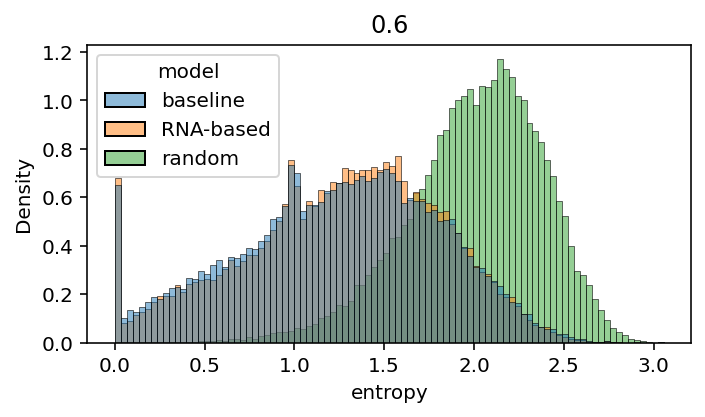

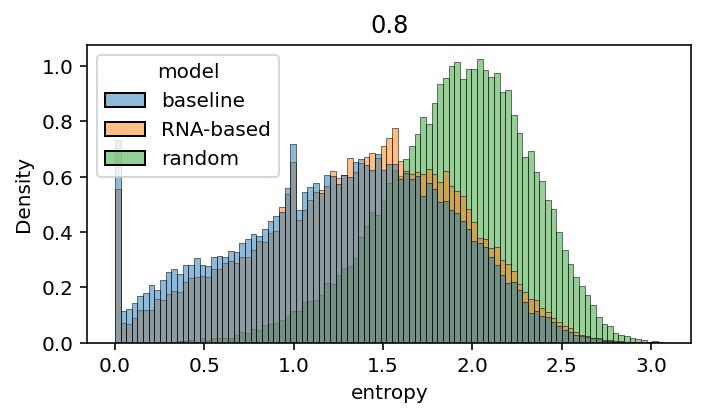

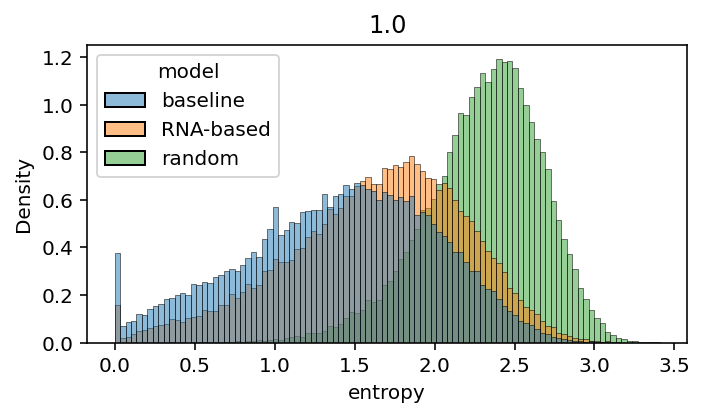

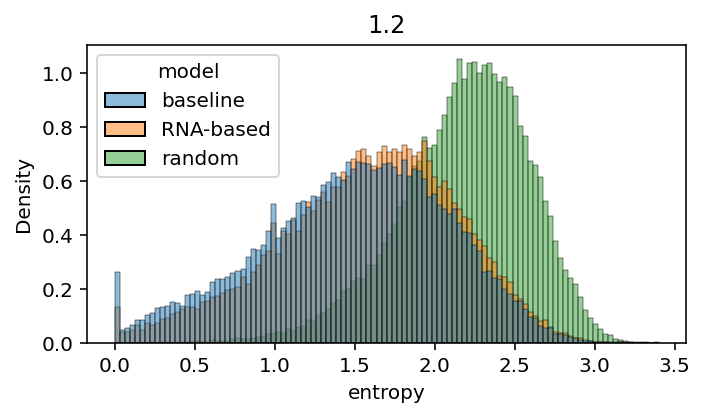

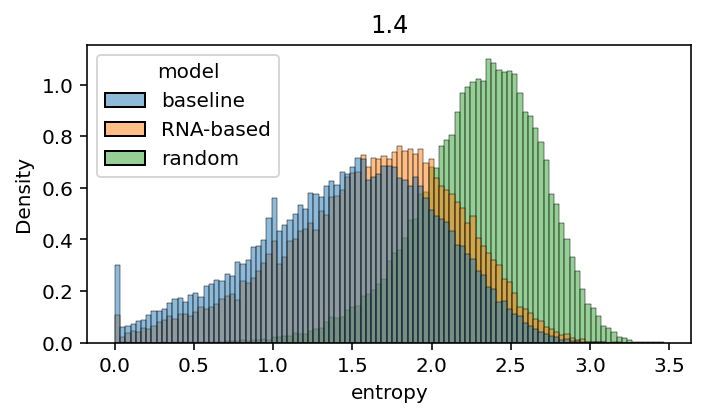

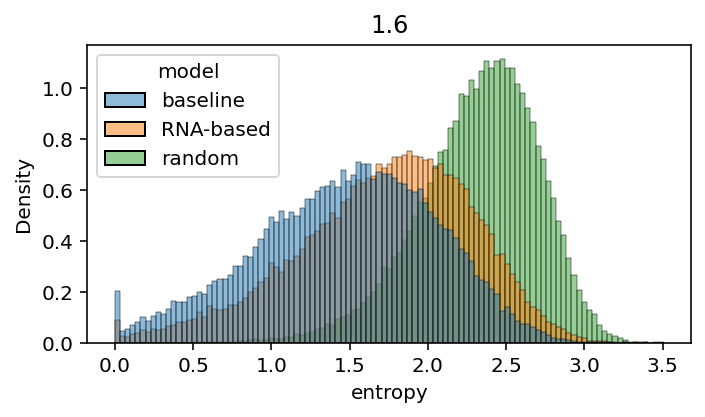

In [2]:
resolutions = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6]

for resolution in resolutions:
    props = pd.read_csv(f'confusion{resolution}/proportions.csv', index_col=0)
    X_props = pd.read_csv(f'destvi{resolution}/proportions.csv', index_col=0)
    random_props = pd.read_csv(f'random{resolution}/proportions.csv', index_col=0)
    
    df = pd.DataFrame({'entropy': stats.entropy(props.values, base=2, axis=1)})
    df['model'] = 'baseline'
    X_df = pd.DataFrame({'entropy': stats.entropy(X_props.values, base=2, axis=1)})
    X_df['model'] = 'RNA-based'
    random_df = pd.DataFrame({'entropy': stats.entropy(random_props.values, base=2, axis=1)})
    random_df['model'] = 'random'
    df_entropy = pd.concat((df, X_df, random_df), ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
    sns.histplot(
        data=df_entropy, x='entropy', hue='model', stat='density', common_norm=False, ax=ax
    )
    ax.set_title(str(resolution))